<a href="https://colab.research.google.com/github/TAbdullah-T/T5-SAD/blob/main/Deep%20Learning/Projects/Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [ ]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

## Import Libraries

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
import os
import numpy as np
from PIL import Image

def load_and_resize_image(img_Path):
  image = Image.open(img_Path).convert('RGB')
  image = image.resize((100,100))
  return np.array(image)


def load_images_with_labels(folder_path):
  img = []
  labels_ = []
  for label in range(43) :
    folder_path_label = os.path.join(folder_path, str(label))
    for filename in os.listdir(folder_path_label):
      img_path = os.path.join(folder_path_label, filename)
      img.append(load_and_resize_image(img_path))
      labels_.append(label)

  img = np.array(img)
  labels_ = np.array(labels_)
  return img, labels_

X, y = load_images_with_labels('/content/Traffic_Signs/Dataset')

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_, y_test_, test_size=0.5, random_state=42)


In [28]:
X_train.shape, y_test.shape

((27446, 100, 100, 3), (5882,))

In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import L1L2
model = Sequential([
    Conv2D(32, (3,3), activation = 'leaky_relu', input_shape = (100,100,3)),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'leaky_relu'),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'leaky_relu'),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'leaky_relu'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(128, (3,3), activation = 'leaky_relu'),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'leaky_relu'),
    Dense(43, activation = 'softmax')
])

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 98, 98, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 47, 47, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 203,083 (793.29 KB)

 Trainable params: 202,699 (791.79 KB)

 Non-trainable params: 384 (1.50 KB)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(datagen.flow(X_train,y_train,batch_size=64),
          batch_size = 200,
          epochs=40,
          validation_data=(X_val/255,y_val),
          verbose=1
          )

Epoch 1/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - accuracy: 0.2723 - loss: 2.8090 - val_accuracy: 0.2486 - val_loss: 2.9060
Epoch 2/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 65s 149ms/step - accuracy: 0.5969 - loss: 1.2125 - val_accuracy: 0.6429 - val_loss: 1.0849
Epoch 3/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 65s 149ms/step - accuracy: 0.7391 - loss: 0.7700 - val_accuracy: 0.6773 - val_loss: 0.9879
Epoch 4/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 64s 148ms/step - accuracy: 0.8075 - loss: 0.5662 - val_accuracy: 0.7574 - val_loss: 0.7220
Epoch 5/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 64s 148ms/step - accuracy: 0.8448 - loss: 0.4473 - val_accuracy: 0.7521 - val_loss: 0.7426
Epoch 6/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 65s 148ms/step - accuracy: 0.8651 - loss: 0.3850 - val_accuracy: 0.7982 - val_loss: 0.5872
Epoch 7/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 64s 148ms/step - accuracy: 0.8922 - loss: 0.3105 - val_accuracy: 0.8272 - val_loss: 0.5433
Epoch 8/40
429/429 ━━━━━━━━━━━━━━━━━━━━ 65s 148ms/step - accuracy: 0.8989 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [19]:
model.evaluate(X_test/255,y_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8733 - loss: 0.4856


[0.5037260055541992, 0.8660319447517395]

The model can preform better but I stoped it too late, there is no time for a retraine

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [ ]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

I can use the test set

In [20]:
y_pred = model.predict(X_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

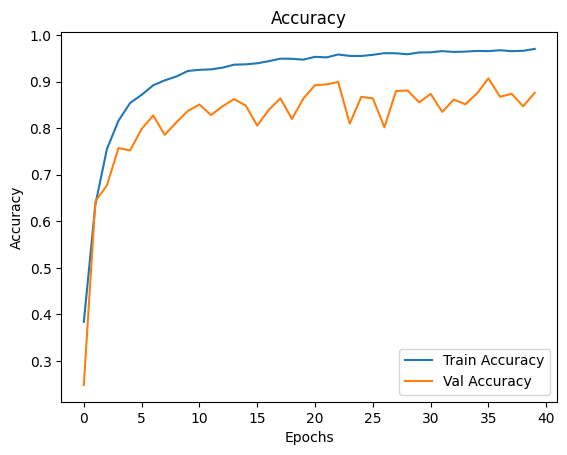

In [24]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

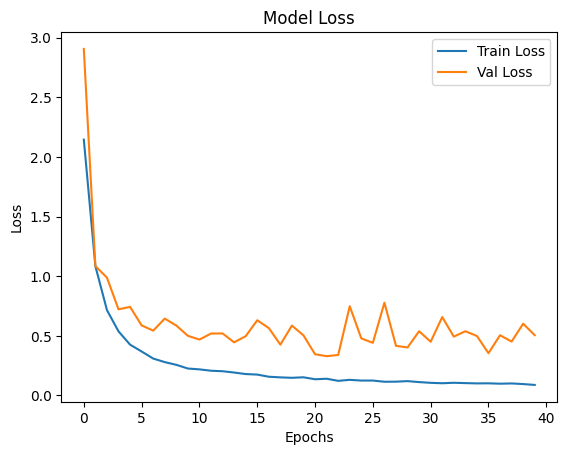

In [25]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [26]:
model.save('traffic_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
- I used Data agumentation to increase the rubostness of the model and help ot learn variate of varation of a single image this will help preventing over fitting and inaddtion it will increse the training data and help in inbalance data set, the size of the image it must be uniformed across all the images in addtion it should be large so i can Maxpool it and learn more paramters

2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?

- Fot all the Dropoutand BN it help in preventing over fitting, for MaxPooling it reduce the size of the image taking the important parts and help in reducing the compixe.

- I started with two CNN32 block staring simple then CNN64 inceasing the kernels to help learn more compix layers, then CNN128 for the same reasone, then FLaaten the image to fed it to the Dense 128 so it feed the output layer with rich information, the output layer is 43 (number of class) with softmax

3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
- - the leaky relu is the most sutable activation function it is not sturating in + ve and reduce the vanishing of the -ve, I traied others like relu, tanh, but relu gave teh best
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
- I have 27k images for the flow I chooses 64 I don't want large number
- number of epochs I tried incresing it gardually until no changing occure
- the number of batch size beacuse it small the convergence happend late and optimizer help increasing it and prevent falling in local minma (adam)

5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
- softmax using the sparse_corssentropy loss it is for more the two classes  

6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
- Dropout and BN,
- the agumentation also helped
- I traied L1_L2 Requlrazation, but it gave negitive results

7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?

8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
- We can notice from the difference between train and val loss and accuracy that the model strugle to generalize for the unseen data we can add requlzation we the model already complix we can't add more layers

9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
yes it is overfitting I can decrease the batch_size for the flow or add more layers with dropout and BN

### Answer Here: